# Barnsley Fern

In this notebook we will explore functions in Python to create a [**fractal**](), a self-similar set of numbers.

We will use several built-in functions from Python including:

* ``math.sqrt``: returns the square root of a real valued number.
    * domain: ?
    * range: ?
* ``random.choice()``: a function to randomly choose an element from a collection
* ``random.uniform()``: a function to return a random number from within a specified domain.

We will also use the matplotlib package for drawing points. Specifically, we will use the ``scatter`` function from the pyplot module in matplotlib

## Some Python preliminaries

We are going to set the notebook to draw our graphs directly in the web page (instead of trying to launch a separte window).

We are also going to **import** (checkout from the library) the random, math

In [1]:
#%matplotlib inline
import random
import matplotlib.pyplot as pp
import math

### Named Tuples

In [2]:
from collections import namedtuple
Point = namedtuple('Point', ['x', 'y'])

## Chaos Game

We are going to create our set using functions that implement the *Chaos Game*.

In [15]:
def f1(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes  p and returns a new point p'
    according to the rule p'= (0, p.y*0.16)
    """
    return Point(0.0, p.y*0.16)
def f2(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes p and returns a new point p'
    according to the rule p' = (0.85*p.x+0.04*p.y, -0.04*p.x+0.85*p.y+1.6)
    """
    return Point(0.85*p.x+0.04*p.y,
                 -0.04*p.x+0.85*p.y+1.6)

def f3(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes p and returns a new point p'
    according to the rule p' = (0.20*p.x-0.26*p.y,
                                0.23*p.x+0.22*p.y+1.60)
    """
    return Point(0.20*p.x-0.26*p.y,
                 0.23*p.x+0.22*p.y+1.60)
def f4(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes p and returns a new point p'
    according to the rule p' = (-0.15*p.x+0.28*p.y,
                                0.26*p.x+0.24*p.y+0.44)
    """
    return Point(-0.15*p.x+0.28*p.y,
                 0.26*p.x+0.24*p.y+0.44)

### Now lets make a [tuple](../SetsAndSequences/Tuples.ipynb) of our functions


In [4]:
functions = (f1,f2,f3,f4)

### Helper Functions

We are also going to define some functions that will help us run the game. These include:

* A function that takes a point (p) and returns a new point (p') from a randomly selected function implementing one of our rules
* A function that will generate a starting point
* A function that returns a sequence of N points generated by our Chaos Game rules
* A function that plots our points

### Remember what a function is

* What is our input?
* What is our output?

In [5]:
def choose_function(functions):
    r = random.uniform(0,1)
    if r < 0.01:
        return functions[0]
    elif r < 0.86:
        return functions[1]
    elif r < 0.93:
        return functions[2]
    else:
        return functions[3]

In [6]:
def new_point(p,functions):
    """
    Arguments:
    
    p: a 2D point stored as a named tuple Point
    functions: a tuple of functions that return
    a new point 
    """
    return choose_function(functions)(p)

In [7]:
def get_points(num_points):
    points = [Point(0.0,0.0)]
    for i in range(num_points):
        points.append(new_point(points[-1],functions))
    return points

In [8]:
def draw_points(points):
    xs = [p.x for p in points]
    ys = [p.y for p in points]
    pp.scatter(xs,ys,s=1,marker ='.')
    

In [9]:
def run_game(num_points):
    draw_points(get_points(num_points))

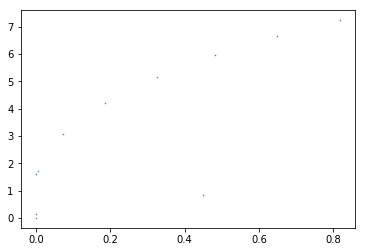

In [10]:
run_game(10)

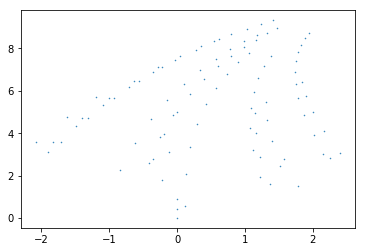

In [11]:
run_game(100)

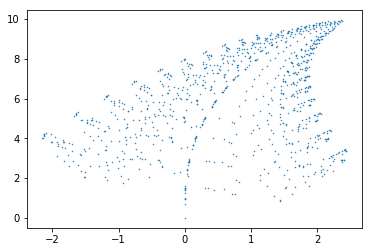

In [12]:
run_game(1000)

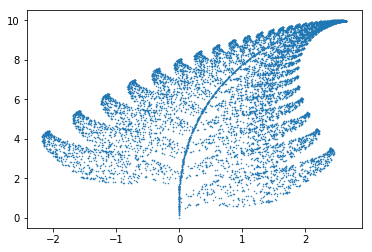

In [13]:
run_game(10000)

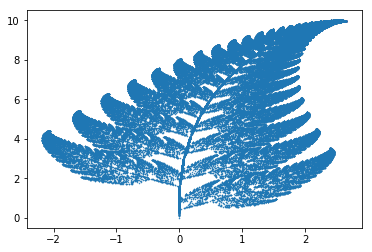

In [14]:
run_game(100000)